In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# Fix the path construction - use forward slashes or raw strings
import os

# Method 1: Use forward slashes (recommended)
path = os.path.abspath(os.path.join("..", "04_S&P500_quant_analysis", "01_data", "S&P500_D_1789-05-01_2025-09-17.csv"))

# Alternative Method 2: Use raw string
# path = os.path.abspath(os.path.join("..", r"04_S&P500_quant_analysis\01_data", "S&P500_D_1789-05-01_2025-09-17.csv"))

# Alternative Method 3: Use pathlib (modern approach)
# from pathlib import Path
# path = Path("..") / "04_S&P500_quant_analysis" / "01_data" / "S&P500_D_1789-05-01_2025-09-17.csv"

# print(f"Path exists: {os.path.exists(path)}")

# Read the CSV file
df = pd.read_csv(path)

# lower case column names for easier access
df.columns = [col.lower() for col in df.columns]

# Set the 'date' column as the index and convert it to datetime
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Show the first few rows of the dataframe
df.head()

,open,high,low,close,volume
date,,,,,
1789-05-01,0.51,0.51,0.51,0.51,0.0
1789-06-01,0.51,0.51,0.51,0.51,0.0
1789-07-01,0.50,0.50,0.50,0.50,0.0
1789-08-01,0.50,0.51,0.50,0.51,0.0
1789-09-01,0.51,0.51,0.50,0.51,0.0


In [54]:
# Calculate simple returns with pct_change()
df['simple_returns'] = df['close'].pct_change()

# Drop NA values that result from pct_change()
df.dropna(inplace=True)

# Show dataframe
df.head()

,open,high,low,close,volume,simple_returns
date,,,,,,
1789-06-01,0.51,0.51,0.51,0.51,0.0,0.000000
1789-07-01,0.50,0.50,0.50,0.50,0.0,-0.019608
1789-08-01,0.50,0.51,0.50,0.51,0.0,0.020000
1789-09-01,0.51,0.51,0.50,0.51,0.0,0.000000
1789-10-01,0.51,0.51,0.51,0.51,0.0,0.000000


In [55]:
# resample to monthly frequency, taking the last observation of each month for OHLCV
monthly_ohlcv = df.resample('M').agg({
    'open': 'last',
    'high': 'last',
    'low': 'last',
    'close': 'last',
    'volume': 'last'
})

# simple_returns for monthly data
monthly_ohlcv['monthly_returns'] = monthly_ohlcv['close'].pct_change()

# Drop NA values that result from pct_change()
monthly_ohlcv.dropna(inplace=True)

# Show dataframe
monthly_ohlcv.head()

,open,high,low,close,volume,monthly_returns
date,,,,,,
1789-07-31,0.50,0.50,0.50,0.50,0.0,-0.019608
1789-08-31,0.50,0.51,0.50,0.51,0.0,0.020000
1789-09-30,0.51,0.51,0.50,0.51,0.0,0.000000
1789-10-31,0.51,0.51,0.51,0.51,0.0,0.000000
1789-11-30,0.51,0.51,0.50,0.50,0.0,-0.019608


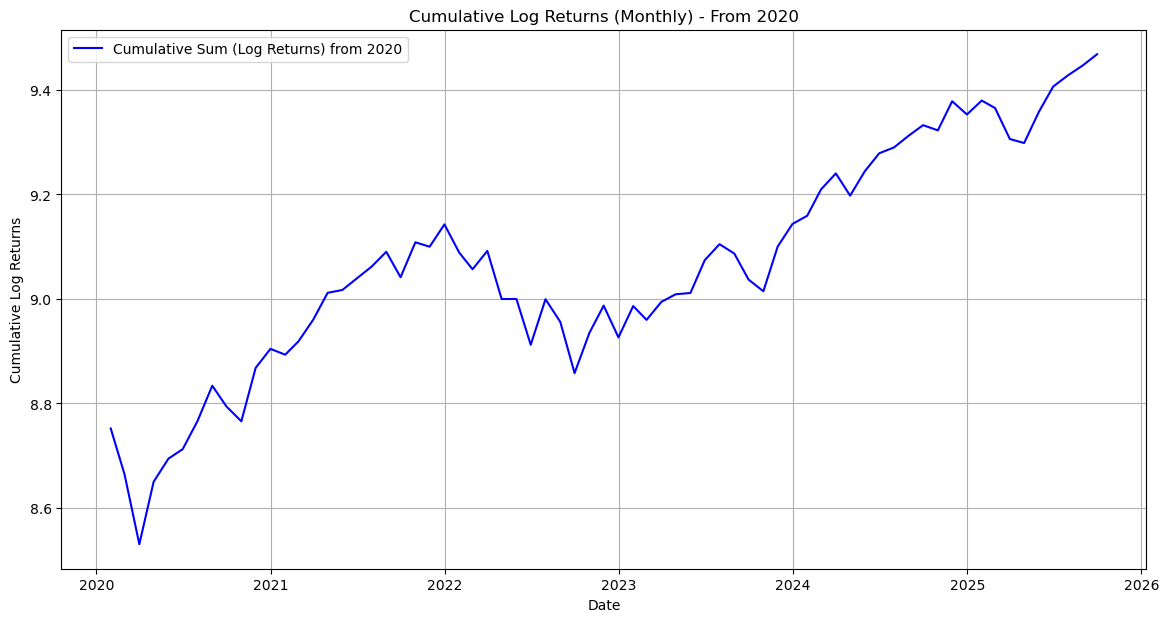

In [56]:
# Calculate log returns (Monthly) for all data
log_returns = (1 + monthly_ohlcv['monthly_returns']).apply(np.log)

# Cumulative sum of log returns (correct for compounding)
cumsum_log = log_returns.cumsum()

# Filter cumulative log returns from 2020 onwards
cumsum_log_2020 = cumsum_log[cumsum_log.index >= '2020-01-01']

# Plot cumulative log returns from 2020
plt.figure(figsize=(14, 7))
plt.plot(cumsum_log_2020, label='Cumulative Sum (Log Returns) from 2020', color='blue')
plt.title('Cumulative Log Returns (Monthly) - From 2020')
plt.xlabel('Date')
plt.ylabel('Cumulative Log Returns')
plt.legend()
plt.grid()
plt.show()

In [57]:
# add year column from DatetimeIndex
monthly_ohlcv['year'] = monthly_ohlcv.index.year

# add month column from DatetimeIndex
monthly_ohlcv['month'] = monthly_ohlcv.index.month

# add day column from DatetimeIndex
monthly_ohlcv['day'] = monthly_ohlcv.index.day

monthly_ohlcv.head()

,open,high,low,close,volume,monthly_returns,year,month,day
date,,,,,,,,,
1789-07-31,0.50,0.50,0.50,0.50,0.0,-0.019608,1789,7,31
1789-08-31,0.50,0.51,0.50,0.51,0.0,0.020000,1789,8,31
1789-09-30,0.51,0.51,0.50,0.51,0.0,0.000000,1789,9,30
1789-10-31,0.51,0.51,0.51,0.51,0.0,0.000000,1789,10,31
1789-11-30,0.51,0.51,0.50,0.50,0.0,-0.019608,1789,11,30


In [58]:
# Select month for the analysis
M = 9  # September

In [59]:
df = monthly_ohlcv.copy()

# select only rows where month == M
df = df[df.month == M]

# count positive months (where monthly_returns > 0)
positive_months = len(df[df['monthly_returns'] > 0])
print(f"Number of positive months in month {M}: {positive_months}")

# count months (length of df)
months_count = len(df)
print(f"Number of months in the dataset for month {M}: {months_count}")

# percentage of positive months
positive_percentage = (positive_months / months_count) * 100
print(f"Percentage of positive months in month {M}: {positive_percentage:.2f}%")

Number of positive months in month 9: 109
Number of months in the dataset for month 9: 236
Percentage of positive months in month 9: 46.19%


In [60]:
df

,open,high,low,close,volume,monthly_returns,year,month,day
date,,,,,,,,,
1789-09-30,0.51,0.51,0.50,0.51,0.000000e+00,0.000000,1789,9,30
1790-09-30,0.54,0.55,0.54,0.55,0.000000e+00,0.018519,1790,9,30
1791-09-30,0.61,0.62,0.61,0.62,0.000000e+00,0.016393,1791,9,30
1792-09-30,0.56,0.61,0.56,0.56,0.000000e+00,-0.017544,1792,9,30
1793-09-30,0.60,0.60,0.60,0.60,0.000000e+00,0.000000,1793,9,30
...,...,...,...,...,...,...,...,...,...
2021-09-30,4370.67,4382.55,4306.24,4307.54,2.292980e+09,-0.047569,2021,9,30
2022-09-30,3633.48,3671.44,3584.13,3585.62,3.142946e+09,-0.093396,2022,9,30
2023-09-30,4328.18,4333.15,4274.86,4288.05,2.406132e+09,-0.048719,2023,9,30


In [61]:
# check unique days months
df['month'].unique()
df['day'].unique()
    
print(df['month'].unique())
print(df['day'].unique())

[9]
[30]
